In [116]:
import pandas as pd
import xgboost as xgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [117]:
data_path='./data1.xlsx'
data = pd.read_excel(data_path)
data['性别'] = data['性别'].apply(lambda x:1 if x == '男'  else 0)
data['获奖情况'] = data['获奖情况'].apply(lambda x: 1 if x == '校级奖学金' else (2 if x == '国家奖学金' else (3 if x == '社会奖学金' else 0)))
data.head()


,Unnamed: 0,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,...,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部,获奖情况
0,0,0,26,1,87.6327,1,72.15,4.0,0,18,...,1,0,0,0,0,0,0,0,0,1
1,1,0,26,2,89.9434,1,70.50,3.0,0,18,...,1,0,0,0,0,0,0,0,0,1
2,2,0,26,3,88.4667,1,NaN,NaN,0,18,...,1,0,0,0,0,0,0,0,0,1
3,3,1,52,2,86.3803,1,76.40,NaN,0,6,...,1,0,0,0,0,0,0,0,0,1
4,4,1,52,3,87.5455,1,NaN,5.0,0,6,...,1,0,0,0,0,0,0,0,0,1


In [118]:
X=data.iloc[:,1:25]
Y=data.iloc[:,25]

In [119]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: 获奖情况, dtype: int64

In [120]:
X.head()

,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,青学之星,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部
0,0,26,1,87.6327,1,72.15,4.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.50,3.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
2,0,26,3,88.4667,1,NaN,NaN,0,18,1,...,0,1,0,0,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.40,NaN,0,6,2,...,0,1,0,0,0,0,0,0,0,0
4,1,52,3,87.5455,1,NaN,5.0,0,6,2,...,0,1,0,0,0,0,0,0,0,0


In [121]:
X = X.drop('“双培计划”学习进步奖', axis=1)
X = X.drop('青学之星', axis=1)
X = X.drop('“双培计划”优秀学生干部', axis=1)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)

In [122]:
X.head()

,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,学术创新,文化活动,体育活动评价成绩,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖
0,0,26,1,87.6327,1,72.150000,4.000000,0,18,1,...,2,0,0,1,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.500000,3.000000,0,18,1,...,2,0,0,1,0,0,0,0,0,0
2,0,26,3,88.4667,1,71.259305,9.723596,0,18,1,...,2,0,0,1,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.400000,9.723596,0,6,2,...,1,0,5,1,0,0,0,0,0,0
4,1,52,3,87.5455,1,71.259305,5.000000,0,6,2,...,1,0,5,1,0,0,0,0,0,0


In [123]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0, random_state=100)
X_train, X_test, y_train, y_test = X, X, Y, Y

In [124]:
xgb_train=xgb.DMatrix(X_train,label=y_train)
xgb_test=xgb.DMatrix(X_test,label=y_test)

In [125]:
import sklearn.metrics as metrics
def f1(preds, dtrain):
    y_train = dtrain.get_label() # 'numpy.ndarray'
    y_pred = [np.argmax(d) for d in preds]
    return 'f1', metrics.f1_score(y_train, y_pred, average='weighted')

In [131]:
params={
    'objective':'multi:softmax',
    'eta':0.1,
    'max_depth':7,
    # 'n_estimators':10,
    'num_class':4,
    'alpha': 0.6,
    'lambda': 1.3,
    'colsample_bytree':0.97,
    'min_child_weight':0.4,
    'gamma':0.015,
}

watchlist=[(xgb_train,'train'),(xgb_test,'test')]
# 设置训练轮次
num_round=500
bst=xgb.train(params,xgb_train,num_round,watchlist,feval=f1)


# result=xgb.cv(params=params,dtrain=xgb_train,nfold=10,metrics='auc',
#              num_boost_round=100,as_pandas=True,seed=123,feval=f1)
# result.shape
# result.head()


[0]	train-mlogloss:1.26980	train-f1:0.80377	test-mlogloss:1.26980	test-f1:0.80377
[1]	train-mlogloss:1.16538	train-f1:0.81013	test-mlogloss:1.16538	test-f1:0.81013
[2]	train-mlogloss:1.07809	train-f1:0.81032	test-mlogloss:1.07809	test-f1:0.81032
[3]	train-mlogloss:1.00384	train-f1:0.81175	test-mlogloss:1.00384	test-f1:0.81175
[4]	train-mlogloss:0.93988	train-f1:0.81235	test-mlogloss:0.93988	test-f1:0.81235
[5]	train-mlogloss:0.88382	train-f1:0.81289	test-mlogloss:0.88382	test-f1:0.81289
[6]	train-mlogloss:0.83525	train-f1:0.81353	test-mlogloss:0.83525	test-f1:0.81353
[7]	train-mlogloss:0.79218	train-f1:0.81441	test-mlogloss:0.79218	test-f1:0.81441
[8]	train-mlogloss:0.75377	train-f1:0.81378	test-mlogloss:0.75377	test-f1:0.81378
[9]	train-mlogloss:0.72018	train-f1:0.81388	test-mlogloss:0.72018	test-f1:0.81388
[10]	train-mlogloss:0.68955	train-f1:0.81480	test-mlogloss:0.68955	test-f1:0.81480
[11]	train-mlogloss:0.66240	train-f1:0.81590	test-mlogloss:0.66240	test-f1:0.81590
[12]	train-mlo

In [127]:
# import matplotlib.pyplot as plt
# plt.plot(range(1, 101), result['train-auc-mean'], 'k', label='Training Error')
# plt.plot(range(1, 101), result['test-auc-mean'], 'b', label='Test Error')
# plt.xlabel('Number of Trees')
# plt.ylabel('mlogloss')
# plt.axhline(0, linestyle='--', color='k', linewidth=1)
# plt.legend()
# plt.title('CV Errors for XGBoost')
# plt.show()


In [132]:
pred=bst.predict(xgb_test)
print(pred)

[1. 1. 1. ... 1. 1. 1.]


In [133]:
#模型评估

error_rate=np.sum(pred!=y_test)/y_test.shape[0]

print('测试集错误率(softmax):{}'.format(error_rate))

accuray=1-error_rate
print('测试集准确率：%.4f' %accuray)
print('F1得分：',metrics.f1_score(y_test, pred, average='weighted'))

测试集错误率(softmax):0.02100815679830996
测试集准确率：0.9790
F1得分： 0.9789647098103401


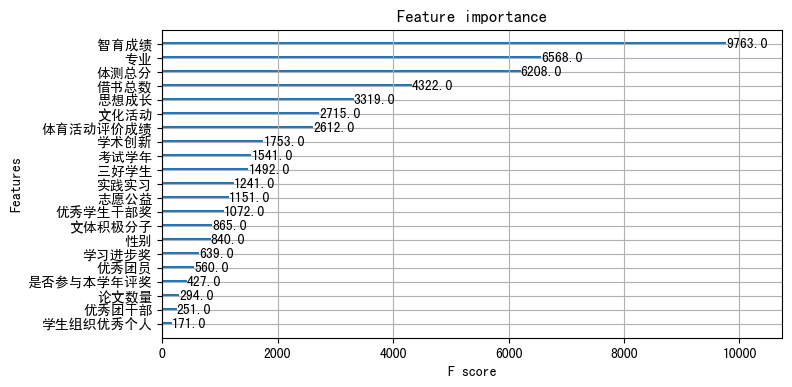

In [130]:
import matplotlib.pyplot as plt
# 中文乱码解决方法
plt.rcParams["font.sans-serif"] = ["SimHei"]
xgb.plot_importance(bst)
plt.rcParams['figure.figsize'] = [8, 4]
plt.show()